In [47]:
import tensorflow as tf
from keras.datasets import mnist

In [48]:
#Loading the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("Training Examples: ",X_train.shape[0]) 
print("Testing Examples: ",X_test.shape[0])

Training Examples:  60000
Testing Examples:  10000


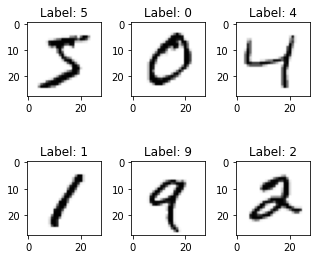

In [49]:
#Visualizing the images
import matplotlib.pyplot as plt
%matplotlib inline

n = 6
images = X_train[:n]
labels = Y_train[:n]

n_row = 2
n_col = 3
fig, axes = plt.subplots(n_row, n_col, figsize=(1.5*n_col,2*n_row))
for i in range(n):
    ax = axes[i//n_col, i%n_col]
    ax.imshow(images[i], cmap='Greys')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()


In [50]:
#Data preprocessing by reshaping the data to feed the model
X_train = X_train.reshape(60000,28,28,1) #60000 training examples, 1-> Grey scale images
X_test = X_test.reshape(10000,28,28,1) #10000 test examples, 1-> Grey scale images

#Normalizing the data
X_train = X_train/255.0
X_test = X_test/255.0

In [51]:
#Creating Callback function to stop the model training when a specific accuracy or loss is achieved!

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy, so training is stopped!")
      self.model.stop_training = True

callbacks = myCallback()

In [52]:
# Creating our CNN model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))

#Compiling our model using appropriate Optimizer, Loss Function and Metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Displays summary of the model we built.
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [53]:
history = model.fit(X_train, Y_train,
                    batch_size=32,
                    epochs=25,
                    callbacks=[callbacks])

Epoch 1/25
60000/60000 [==============================] - 6s 99us/step - loss: 0.1563 - accuracy: 0.9531
Epoch 2/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.0531 - accuracy: 0.9837
Epoch 3/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.0393 - accuracy: 0.9878
Epoch 4/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.0314 - accuracy: 0.9899
Epoch 5/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.0247 - accuracy: 0.9918
Epoch 6/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.0204 - accuracy: 0.9933
Epoch 7/25
60000/60000 [==============================] - 6s 95us/step - loss: 0.0157 - accuracy: 0.9950
Epoch 8/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.0133 - accuracy: 0.9954
Epoch 9/25
60000/60000 [==============================] - 6s 97us/step - loss: 0.0107 - accuracy: 0.9963
Epoch 10/25
60000/60000 [==============================

In [56]:
#Evaluation of the model on Testing images

test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

10000/10000 [==============================] - 1s 53us/step
Test Loss:  0.039875187334429414
Test Accuracy:  0.9912999868392944
